In [1]:
import pandas
import numpy
import seaborn
import matplotlib
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, validation_curve, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
data_frame = pandas.read_csv(filepath_or_buffer='cal-housing.csv')

In [3]:
column_to_predict = 'median_house_value'
categories_columns = ['ocean_proximity']
numerics_columns = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]

In [4]:
# outliers
outliers = data_frame[data_frame[column_to_predict] == 500001].index 
print(f'There are {len(outliers)} outliers')
data_frame.drop(outliers, inplace=True)

There are 965 outliers


In [5]:
# handle missing values
for c in data_frame.columns:
    if data_frame[c].hasnans:
        m = data_frame[c].mean()
        data_frame[c].fillna(value=m, inplace=True)

In [6]:
columns_categories = pandas.DataFrame()

for c in categories_columns:
    column = pandas.get_dummies(data=data_frame[c], prefix=c + '_')
    columns_categories = pandas.concat((columns_categories, column), axis=1)

columns_categories

,ocean_proximity__<1H OCEAN,ocean_proximity__INLAND,ocean_proximity__ISLAND,ocean_proximity__NEAR BAY,ocean_proximity__NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [7]:
data_frame.drop(columns=categories_columns, inplace=True)
data_frame = pandas.concat([data_frame, columns_categories], axis=1)

In [8]:
data_frame.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity__<1H OCEAN,ocean_proximity__INLAND,ocean_proximity__ISLAND,ocean_proximity__NEAR BAY,ocean_proximity__NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [9]:
columns_to_remove = []
columns_to_use = list(data_frame.columns)

for u in columns_to_remove:
    columns_to_use.remove(u)
    if numerics_columns.count(u) > 0:
        numerics_columns.remove(u)

X = data_frame.drop(columns=columns_to_remove)
y = data_frame[column_to_predict]

In [10]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity__<1H OCEAN,ocean_proximity__INLAND,ocean_proximity__ISLAND,ocean_proximity__NEAR BAY,ocean_proximity__NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [11]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 19675, dtype: float64

In [12]:
useMinMaxScaler = True
if useMinMaxScaler:
    column_to_predict_idx = data_frame.columns.get_loc(column_to_predict)
    cols = list(range(0, data_frame.shape[1]))
    cols.remove(column_to_predict_idx)

    scaler = MinMaxScaler()
    scaler.fit(data_frame)
    data_frame = scaler.transform(data_frame)    
    
data_frame = pandas.DataFrame(data_frame, columns=columns_to_use)

X = data_frame[numerics_columns]
y = data_frame[column_to_predict]

In [13]:
RMS = 'neg_mean_squared_error'
R2 = 'r2'

In [14]:
ridge = Ridge(fit_intercept=True, normalize=False, solver='sag')

In [15]:
alpha_vals = numpy.logspace(-5, -0.1 ,20)
alpha_vals

array([1.00000000e-05, 1.81090112e-05, 3.27936286e-05, 5.93860187e-05,
       1.07542208e-04, 1.94748304e-04, 3.52669921e-04, 6.38650355e-04,
       1.15653264e-03, 2.09436625e-03, 3.79269019e-03, 6.86818691e-03,
       1.24376073e-02, 2.25232770e-02, 4.07874276e-02, 7.38619982e-02,
       1.33756775e-01, 2.42220294e-01, 4.38637001e-01, 7.94328235e-01])

In [16]:
train_score, val_score = validation_curve(ridge, X, y, param_name='alpha', param_range=alpha_vals, cv=5, scoring=RMS)

In [17]:
train_score_mean = -numpy.mean(train_score, axis=1)
train_score_std = numpy.std(train_score, axis=1)
val_score_mean = -numpy.mean(val_score, axis=1)
val_score_std = numpy.std(val_score, axis=1)

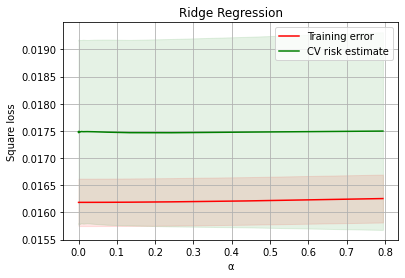

In [18]:
#plt.figure(figsize=(15, 15))
plt.title('Ridge Regression')

plt.fill_between(alpha_vals, train_score_mean - train_score_std,
                 train_score_mean + train_score_std, alpha=0.1,
                 color="r")
plt.fill_between(alpha_vals, val_score_mean - val_score_std,
                 val_score_mean + val_score_std, alpha=0.1, color="g")

plt.plot(alpha_vals, train_score_mean, color="r",
         label="Training error")
plt.plot(alpha_vals, val_score_mean, color="g",
         label="CV risk estimate")

plt.legend()
plt.xlabel('α')
plt.ylabel('Square loss')
plt.grid()
plt.show()

In [19]:
# best alpha
ridge.alpha=0.001

Cross-Validate risk etimete is 0.017 

In [20]:
scores = cross_val_score(ridge, X, y, cv=5, scoring=RMS)
-scores.mean()

0.017494103901864993

test set 30%

In [21]:
min_ts = int(X.shape[0] * 0.01)
max_ts = int(X.shape[0] * 0.8)
step_ts = int(X.shape[0] * 0.1)
sizes = range(min_ts, max_ts, step_ts)

print(sizes)

range(196, 15740, 1967)


In [22]:
train_size, train_score, val_score = learning_curve(ridge, X, y, train_sizes=sizes, cv=5, scoring=RMS, shuffle=True) 

In [23]:
train_score_mean = -numpy.mean(train_score, axis=1)
train_score_std = numpy.std(train_score, axis=1)
val_score_mean = -numpy.mean(val_score, axis=1)
val_score_std = numpy.std(val_score, axis=1)

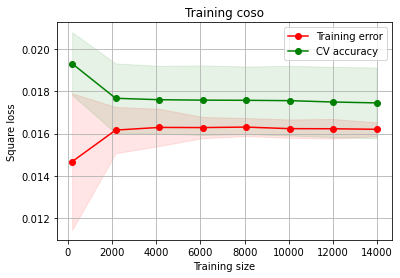

In [24]:
#plt.figure(figsize=(15, 15))
plt.title('Training coso')

plt.fill_between(sizes, train_score_mean - train_score_std,
                 train_score_mean + train_score_std, alpha=0.1,
                 color="r")
plt.fill_between(sizes, val_score_mean - val_score_std,
                 val_score_mean + val_score_std, alpha=0.1, color="g")

plt.plot(sizes, train_score_mean, 'o-', color="r",
         label="Training error")
plt.plot(sizes, val_score_mean, 'o-', color="g",
         label="CV accuracy")

plt.legend()
plt.xlabel('Training size')
plt.ylabel('Square loss')
plt.grid()
plt.show()

In [25]:
val_score_std

array([0.00149051, 0.00165296, 0.00160867, 0.00165266, 0.00160357,
       0.00165464, 0.00166835, 0.00167985])

In [26]:
train_score_std

array([0.00324386, 0.00109727, 0.00088388, 0.00050616, 0.00042868,
       0.00043622, 0.00046454, 0.00033267])

In [27]:
coef_list = []

for s in sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=s, random_state=42)
    ridge.fit(X_train, y_train)
    coef_list.append(ridge.coef_)

coef_matrix = numpy.array(coef_list)

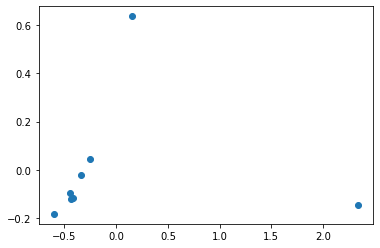

In [28]:
pca = decomposition.PCA(n_components=2)
pca.fit(coef_matrix)
coef_pca = pca.transform(coef_matrix)

fig, ax = plt.subplots()
#ax.set_xlim(-1.5, 1.5)
#ax.set_ylim(-0.5, 0.5)
plt.scatter(coef_pca[:,0], coef_pca[:,1])

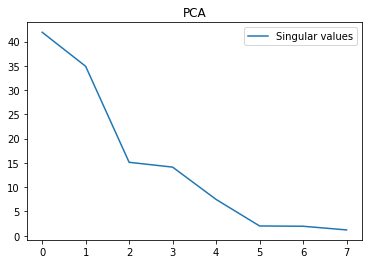

In [29]:
pca = decomposition.PCA(n_components= 8 )
pca.fit(X)

plt.title('PCA')
plt.plot(pca.singular_values_, label='Singular values')
plt.legend()
plt.show()

In [30]:
pca = decomposition.PCA(n_components= 5)
pca.fit(X)
X_pca = pca.transform(X)

In [31]:
scores = cross_val_score(ridge, X_pca, y, cv=5, scoring=RMS)
-scores.mean()

0.018802312922627965

In [32]:
train_size, train_score, val_score = learning_curve(ridge, X_pca, y, train_sizes=sizes, cv=5, scoring=RMS, shuffle=True)

In [33]:
train_score_mean = -numpy.mean(train_score, axis=1)
train_score_std = numpy.std(train_score, axis=1)
val_score_mean = -numpy.mean(val_score, axis=1)
val_score_std = numpy.std(val_score, axis=1)

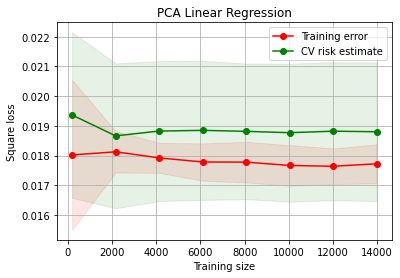

In [34]:
plt.title('PCA Linear Regression')

plt.fill_between(sizes, train_score_mean - train_score_std,
                 train_score_mean + train_score_std, alpha=0.1,
                 color="r")
plt.fill_between(sizes, val_score_mean - val_score_std,
                 val_score_mean + val_score_std, alpha=0.1, color="g")

plt.plot(sizes, train_score_mean, 'o-', color="r",
         label="Training error")
plt.plot(sizes, val_score_mean, 'o-', color="g",
         label="CV risk estimate")

plt.legend()
plt.xlabel('Training size')
plt.ylabel('Square loss')
plt.grid()
plt.show()

In [35]:
coef_list = []

for s in sizes:
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=s, random_state=42)
    ridge.fit(X_train, y_train)
    coef_list.append(ridge.coef_)

coef_matrix = numpy.array(coef_list)

pca = decomposition.PCA(n_components=2)
pca.fit(coef_matrix)
coef_pca = pca.transform(coef_matrix)

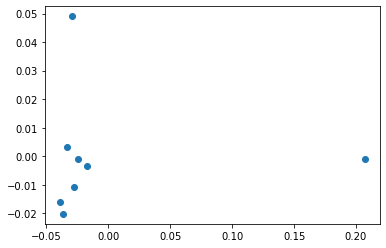

In [36]:
fig, ax = plt.subplots()
#ax.set_xlim(-1.5, 1.5)
#ax.set_ylim(-0.5, 0.5)
plt.scatter(coef_pca[:,0], coef_pca[:,1])

### Lasso

In [37]:
lasso = Lasso(fit_intercept=True, normalize=True)

In [38]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.211155,0.567481,0.784314,0.022331,0.019711,0.008941,0.020395,0.539668
1,0.212151,0.565356,0.392157,0.180503,0.171349,0.067210,0.186842,0.538027
2,0.210159,0.564293,1.000000,0.037260,0.029179,0.013818,0.028783,0.466028
3,0.209163,0.564293,1.000000,0.032352,0.036163,0.015555,0.035691,0.354699
4,0.209163,0.564293,1.000000,0.041330,0.043148,0.015752,0.042270,0.230776
...,...,...,...,...,...,...,...,...
19670,0.324701,0.737513,0.470588,0.042296,0.057737,0.023599,0.053947,0.073130
19671,0.312749,0.738576,0.333333,0.017676,0.022971,0.009894,0.018421,0.141853
19672,0.311753,0.732200,0.313725,0.057277,0.074965,0.028140,0.070888,0.082764
19673,0.301793,0.732200,0.333333,0.047256,0.063169,0.020684,0.057072,0.094295


In [39]:
alpha_vals = numpy.linspace(0.01, 1, 20)
train_score, val_score = validation_curve(lasso, X, y, param_name='alpha', param_range=alpha_vals, cv=5, scoring=RMS)

In [40]:
train_score_mean = -numpy.mean(train_score, axis=1)
train_score_std = numpy.std(train_score, axis=1)
val_score_mean = -numpy.mean(val_score, axis=1)
val_score_std = numpy.std(val_score, axis=1)

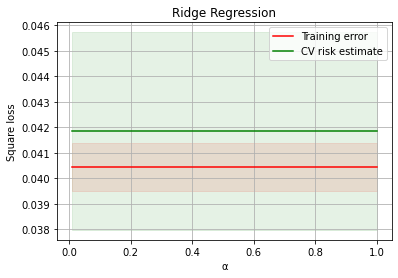

In [41]:
#plt.figure(figsize=(15, 15))
plt.title('Ridge Regression')

plt.fill_between(alpha_vals, train_score_mean - train_score_std,
                 train_score_mean + train_score_std, alpha=0.1,
                 color="r")
plt.fill_between(alpha_vals, val_score_mean - val_score_std,
                 val_score_mean + val_score_std, alpha=0.1, color="g")

plt.plot(alpha_vals, train_score_mean, color="r",
         label="Training error")
plt.plot(alpha_vals, val_score_mean, color="g",
         label="CV risk estimate")

plt.legend()
plt.xlabel('α')
plt.ylabel('Square loss')
plt.grid()
plt.show()

In [42]:
scores = cross_val_score(lasso, X, y, cv=5, scoring=RMS)
-scores.mean()

0.041853445703585714

In [43]:
Ltrain_size, Ltrain_score, Lval_score = learning_curve(lasso, X, y, train_sizes=sizes, cv=5, scoring=RMS, shuffle=True)

In [44]:
Ltrain_score_mean = -numpy.mean(Ltrain_score, axis=1)
Ltrain_score_std = numpy.std(Ltrain_score, axis=1)
Lval_score_mean = -numpy.mean(Lval_score, axis=1)
Lval_score_std = numpy.std(Lval_score, axis=1)

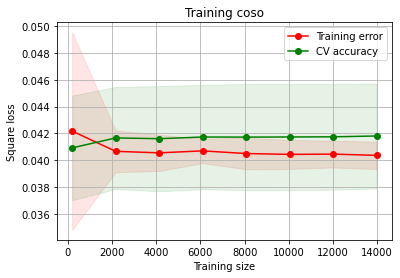

In [45]:
plt.title('Training coso')

plt.fill_between(sizes, Ltrain_score_mean - Ltrain_score_std,
                 Ltrain_score_mean + Ltrain_score_std, alpha=0.1,
                 color="r")
plt.fill_between(sizes, Lval_score_mean - Lval_score_std,
                 Lval_score_mean + Lval_score_std, alpha=0.1, color="g")

plt.plot(sizes, Ltrain_score_mean, 'o-', color="r",
         label="Training error")
plt.plot(sizes, Lval_score_mean, 'o-', color="g",
         label="CV accuracy")

plt.legend()
plt.xlabel('Training size')
plt.ylabel('Square loss')
plt.grid()
plt.show()